In [4]:
import pandas as pd

# Read in the data
pumpkins = pd.read_csv("../data/US-pumpkins.csv")

# We want to be consistent with our math so drop stuff that does not use bushels
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case = True)]

pumpkins.head()




,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [5]:
# A lot of empty values, let's check just how many
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

# Our goal is to find the average price of pumpkins per month

Do do this, we will need the columns Package (to make sure we are comparing like values), Date (for month), Low Price, and High Price

In [6]:
# Define columns we need
new_columns = ["Package", "Date", "Low Price", "High Price"]

# Drop the columns we don't
filtered_pumpkins = pumpkins.drop([column for column in pumpkins if column not in new_columns], axis=1)

In [17]:
# Grab the months from the dates
months = pd.DatetimeIndex(pumpkins["Date"]).month

# Solve for average prices
average_price =(pumpkins["Low Price"] + pumpkins["High Price"])/ 2

# Now create a new data frame
new_pumpkins = pd.DataFrame({'Month': months, 'Package': filtered_pumpkins['Package'], 'Average Price': average_price})


In [18]:
# Normalize the code so that we account for different bushel sizes
new_pumpkins.loc[new_pumpkins['Package'].str.contains("1 1/9"), 'Average Price'] = average_price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains("1/2"), 'Average Price'] = average_price/(1/2)


In [19]:
new_pumpkins.tail()

,Month,Package,Average Price
1738,9,1/2 bushel cartons,30.00
1739,9,1/2 bushel cartons,28.75
1740,9,1/2 bushel cartons,25.75
1741,9,1/2 bushel cartons,24.00
1742,9,1/2 bushel cartons,24.00


In [20]:
new_pumpkins.head()

,Month,Package,Average Price
70,9,1 1/9 bushel cartons,13.5
71,9,1 1/9 bushel cartons,16.2
72,10,1 1/9 bushel cartons,16.2
73,10,1 1/9 bushel cartons,15.3
74,10,1 1/9 bushel cartons,13.5


# Now let's plot it

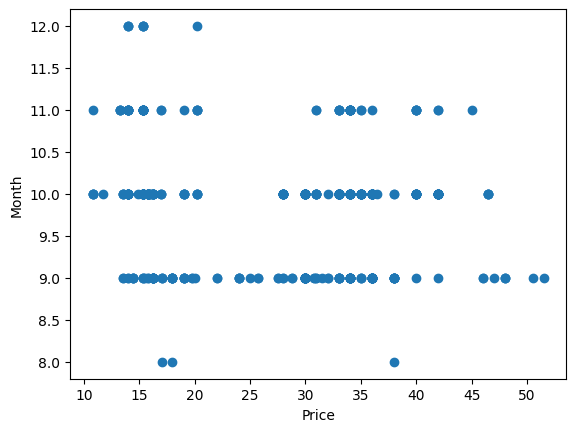

In [30]:
import matplotlib.pyplot as plt


# We are going to try using a scatter plot (bad idea)


# Make the x (price) and the y (month) for the scatter plot
price = new_pumpkins["Average Price"]
month = new_pumpkins["Month"]

# Generate the scatter plot
plt.scatter(price, month)

# Formatting and printing
plt.xlabel("Price")
plt.ylabel("Month")

plt.show()


# Let's use a barchart instead

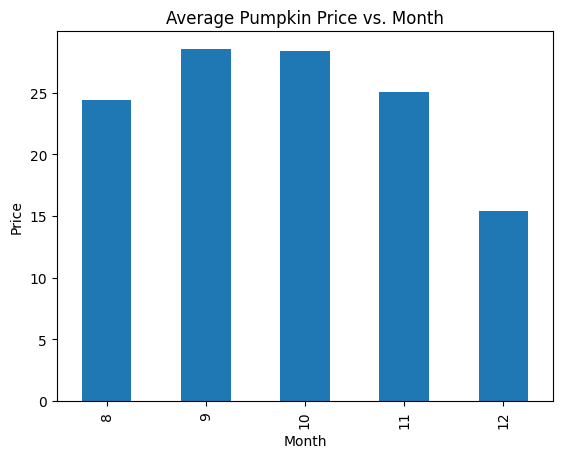

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# We are going to use the average price over the whole month now

# Use numpy to do that averaging work
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='bar')

# Formatting
plt.title("Average Pumpkin Price vs. Month")
plt.xlabel("Month")
plt.ylabel("Price")

plt.show()
